Experimento Super


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import signal
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
%matplotlib inline
palette = sns.color_palette("bright", 10)

In [2]:
df=pd.read_csv("dataframe_hrv.csv")
df

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,marker,newtime,stress,time,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,-0.001974,-0.004737,77.815789,10.801842,12.529684,2.417132,10.889447,0.614632,NaN,12.529684,0.000000,12.529684,0.973684,0.617297,3.558630e-02,0.015203,0.055556,0.001238,0.000000,0.000696,0.000407,0.000135,3.00200
1,0.002935,-0.004457,101.978261,10.750609,30.503500,2.417109,11.251065,0.647826,NaN,30.503500,0.000000,30.503500,0.978261,0.647889,1.354660e-02,0.013858,0.045455,0.000144,0.000000,0.000009,0.000060,0.000075,0.79371
2,0.006745,-0.003426,104.957447,10.557234,52.523021,2.226872,11.379638,0.646383,NaN,52.523021,0.000000,52.523021,0.978723,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
3,-0.004043,-0.002532,87.702128,10.640128,74.402170,2.173021,11.470830,0.645000,NaN,74.402170,0.000000,74.402170,0.978723,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
4,0.012745,-0.004426,88.829787,10.699319,96.219617,2.017106,11.135255,0.645000,NaN,96.219617,0.000000,96.219617,0.978723,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,0.235263,0.424921,67.263158,33.493789,1384.599395,1.352105,5.373237,0.870763,9.597576,69562.420500,0.131579,1384.599395,0.973684,0.869892,8.546400e-02,0.045648,0.083333,0.096370,0.096370,0.000000,0.000000,0.000000,NaN
4125,0.266158,0.438684,69.500000,33.406211,1405.522816,1.361316,5.372211,0.877605,9.601515,69583.343920,0.131579,1405.522816,0.973684,0.876919,6.689060e-02,0.032167,0.027778,0.059283,0.059283,0.000000,0.000000,0.000000,NaN
4126,0.199139,0.411472,68.972222,33.246056,1423.220333,1.417806,5.706972,0.912306,9.603871,69027.154060,0.138889,1423.220333,0.972222,0.912571,8.870620e-02,0.045629,0.058824,0.090722,0.090722,0.000000,0.000000,0.000000,NaN
4127,0.247811,0.423108,67.189189,33.370378,1443.257216,1.370865,5.494568,0.908541,9.590312,69341.889860,0.135135,1443.257216,0.972973,0.906889,1.102240e-01,0.044973,0.057143,0.153265,0.153265,0.000000,0.000000,0.000000,NaN


In [3]:
selected_x_columns = ['HR','interval in seconds','AVNN', 'RMSSD', 'pNN50', 'TP', 'ULF', 'VLF', 'LF', 'HF','LF_HF']

In [4]:
df.columns

Index(['ECG', 'EMG', 'HR', 'RESP', 'Seconds', 'footGSR', 'handGSR',
       'interval in seconds', 'marker', 'newtime', 'stress', 'time', 'NNRR',
       'AVNN', 'SDNN', 'RMSSD', 'pNN50', 'TP', 'ULF', 'VLF', 'LF', 'HF',
       'LF_HF'],
      dtype='object')

In [5]:
def fix_stress(df='', colum = 'stress'):
    df['stress'] = np.where(df['stress'] >=0.5, 1, 0)
    display(df.stress.unique())
    return df

In [6]:
df = fix_stress(df)
df

array([0, 1])

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,marker,newtime,stress,time,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,-0.001974,-0.004737,77.815789,10.801842,12.529684,2.417132,10.889447,0.614632,NaN,12.529684,0,12.529684,0.973684,0.617297,3.558630e-02,0.015203,0.055556,0.001238,0.000000,0.000696,0.000407,0.000135,3.00200
1,0.002935,-0.004457,101.978261,10.750609,30.503500,2.417109,11.251065,0.647826,NaN,30.503500,0,30.503500,0.978261,0.647889,1.354660e-02,0.013858,0.045455,0.000144,0.000000,0.000009,0.000060,0.000075,0.79371
2,0.006745,-0.003426,104.957447,10.557234,52.523021,2.226872,11.379638,0.646383,NaN,52.523021,0,52.523021,0.978723,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
3,-0.004043,-0.002532,87.702128,10.640128,74.402170,2.173021,11.470830,0.645000,NaN,74.402170,0,74.402170,0.978723,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
4,0.012745,-0.004426,88.829787,10.699319,96.219617,2.017106,11.135255,0.645000,NaN,96.219617,0,96.219617,0.978723,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,0.235263,0.424921,67.263158,33.493789,1384.599395,1.352105,5.373237,0.870763,9.597576,69562.420500,0,1384.599395,0.973684,0.869892,8.546400e-02,0.045648,0.083333,0.096370,0.096370,0.000000,0.000000,0.000000,NaN
4125,0.266158,0.438684,69.500000,33.406211,1405.522816,1.361316,5.372211,0.877605,9.601515,69583.343920,0,1405.522816,0.973684,0.876919,6.689060e-02,0.032167,0.027778,0.059283,0.059283,0.000000,0.000000,0.000000,NaN
4126,0.199139,0.411472,68.972222,33.246056,1423.220333,1.417806,5.706972,0.912306,9.603871,69027.154060,0,1423.220333,0.972222,0.912571,8.870620e-02,0.045629,0.058824,0.090722,0.090722,0.000000,0.000000,0.000000,NaN
4127,0.247811,0.423108,67.189189,33.370378,1443.257216,1.370865,5.494568,0.908541,9.590312,69341.889860,0,1443.257216,0.972973,0.906889,1.102240e-01,0.044973,0.057143,0.153265,0.153265,0.000000,0.000000,0.000000,NaN


In [7]:
# Limpeza de dados e complemento das informacoes dos 'missing values' com a media
def missing_values(df=''):
    df.reset_index(inplace=True)
    df.replace([np.inf, -np.inf], np.nan, inplace=True) # coluna com valor nula serah completada com nan
    df[~np.isfinite(df)] = np.nan # onde for true, completa com 'nan'
#     display("antes, com valores nan")
    df.plot(y=["HR"], title = "Com valores NaN") 
    df.HR.fillna((df['HR'].mean()), inplace=True) # completa os compos vazios de HR com seu valor medio
    df['HR'] = signal.medfilt(df['HR'],13)
#     display("depois, com valores preenchidos pela media")
    df.plot(y=["HR"], title = "Com vals preenchidos pela media") 
    
    df.fillna(df.mean(),inplace=True) # generaliza o preenchimento dos vals. para todas as colunas com nan
    return df

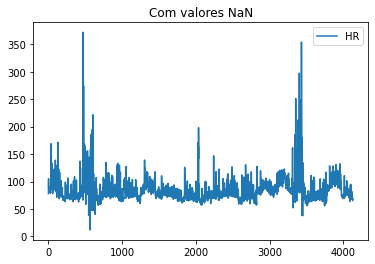

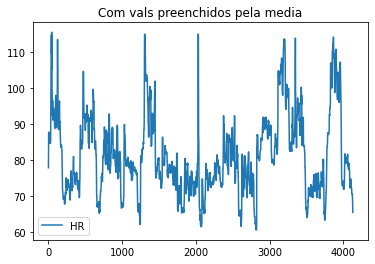

In [8]:
df = missing_values(df)

In [9]:
X = df[selected_x_columns]
Y = df['stress']
X

,HR,interval in seconds,AVNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,77.815789,0.614632,0.617297,0.015203,0.055556,0.001238,0.000000,0.000696,0.000407,0.000135,3.002000
1,79.521739,0.647826,0.647889,0.013858,0.045455,0.000144,0.000000,0.000009,0.000060,0.000075,0.793710
2,87.319149,0.646383,0.645000,0.000000,0.000000,0.060604,0.000000,0.000728,0.000003,0.000001,3.555695
3,87.702128,0.645000,0.645000,0.000000,0.000000,0.060604,0.000000,0.000728,0.000003,0.000001,3.555695
4,87.702128,0.645000,0.645000,0.000000,0.000000,0.060604,0.000000,0.000728,0.000003,0.000001,3.555695
...,...,...,...,...,...,...,...,...,...,...,...
4124,69.315789,0.870763,0.869892,0.045648,0.083333,0.096370,0.096370,0.000000,0.000000,0.000000,3.555695
4125,68.972222,0.877605,0.876919,0.032167,0.027778,0.059283,0.059283,0.000000,0.000000,0.000000,3.555695
4126,67.263158,0.912306,0.912571,0.045629,0.058824,0.090722,0.090722,0.000000,0.000000,0.000000,3.555695
4127,67.189189,0.908541,0.906889,0.044973,0.057143,0.153265,0.153265,0.000000,0.000000,0.000000,3.555695


In [10]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4124    0
4125    0
4126    0
4127    0
4128    0
Name: stress, Length: 4129, dtype: int64

In [11]:
X_train, X_vt, y_train, y_vt = train_test_split(X, Y, test_size=0.4,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_vt,y_vt, test_size = 0.5,random_state= 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2477, 11) (2477,)
(826, 11) (826,)
(826, 11) (826,)


Normalização


In [13]:
X_train_nor = X_train/255
X_val_nor = X_val/255
X_test_nor = X_test/255

Standard 


In [14]:
std = StandardScaler()

std.fit(X_train)
X_train_std = std.transform(X_train)
X_val_std = std.transform(X_val)
x_test_std = std.transform(X_test) 

PCA 

(4, 11)
(4, 11)


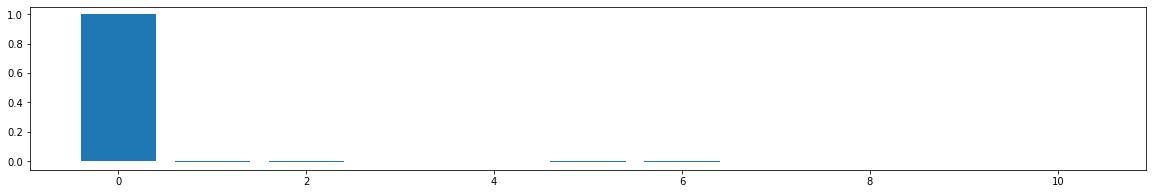

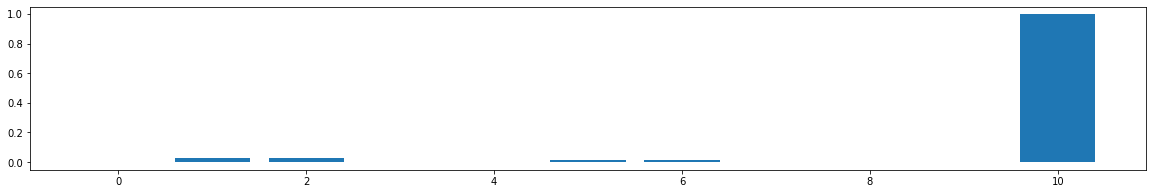

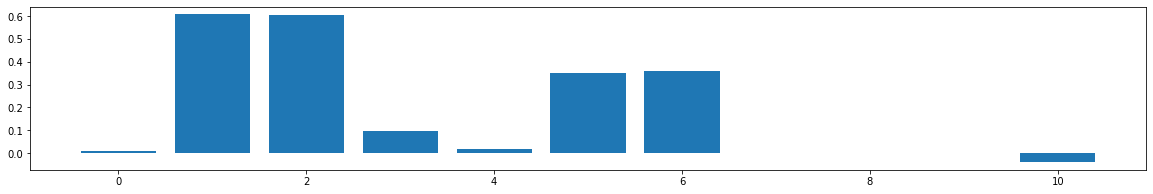

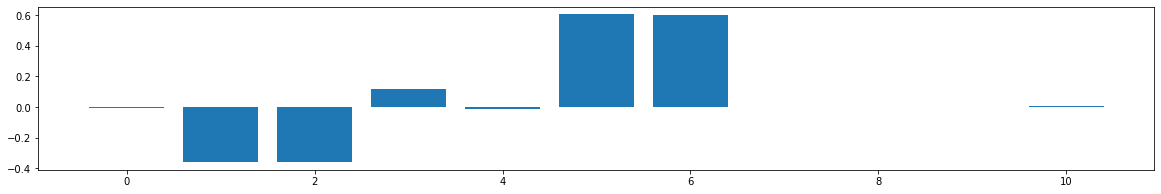

In [15]:
n_components = 4
pca = PCA(n_components = n_components)
pca.fit(X_train)
print(pca.components_.shape)
print(pca.components_.shape)
for i in range(0,4):
  plt.figure(figsize=(20, 3))
  plt.bar(range(11),pca.components_[i])
  plt.show()

In [17]:
y = y_train.ravel()
y_v = y_val.ravel()
y_t = y_test.ravel()
print(y.shape,y_v.shape)

(2477,) (826,)


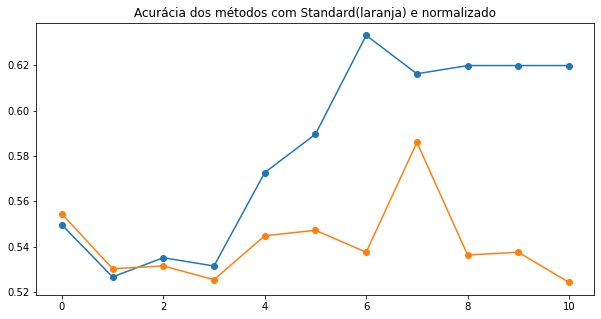

In [19]:
acc=[]
accstd=[]
accnor=[]
for i in range(1,12):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_val_pca = pca.transform(X_val)

  clf = GaussianNB()
  clf.fit(X_train_pca, y)
  pred_test = clf.predict(X_val_pca)
  acc.append(clf.score(X_val_pca, y_v))

  X_train_pca_std = pca.fit_transform(X_train_std)
  X_val_pca_std= pca.transform(X_val_std)
  clf.fit(X_train_pca_std,y)
  pred_test = clf.predict(X_val_pca_std)
  accstd.append(clf.score(X_val_pca_std, y_v))

  X_train_pca_nor = pca.fit_transform(X_train_nor)
  X_val_pca_nor = pca.transform(X_val_nor)
  clf.fit(X_train_pca_nor,y)
  pred_test = clf.predict(X_val_pca_nor)
  accnor.append(clf.score(X_val_pca_nor,y_v))
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
plt.title("Acurácia dos métodos com Standard(laranja) e normalizado")
plt.plot(acc,'-o')
plt.plot(accstd,'-o')
plt.show()

[[266 149]
 [236 175]]
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       415
           1       0.54      0.43      0.48       411

    accuracy                           0.53       826
   macro avg       0.54      0.53      0.53       826
weighted avg       0.53      0.53      0.53       826

Acurácia: 0.5338983050847458
Matriz de confusão, não normalizada
[[287 128]
 [110 301]]
Matriz normalizada
[[0.69156627 0.30843373]
 [0.2676399  0.7323601 ]]


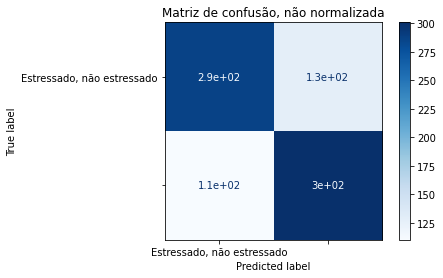

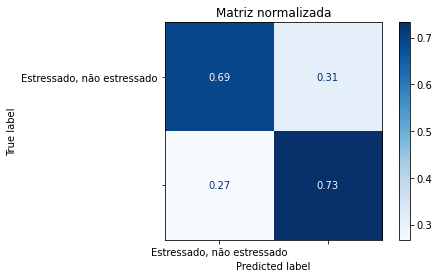

In [20]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = GaussianNB()
clf.fit(X_train_pca, y)
pred_test = clf.predict(X_test_pca)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))
print("Acurácia:", accuracy_score(y_test,pred_test))
class_names = ['Estressado, não estressado']
clf = DecisionTreeClassifier().fit(X_train_pca,y)
titles_options = [("Matriz de confusão, não normalizada", None),
                  ("Matriz normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

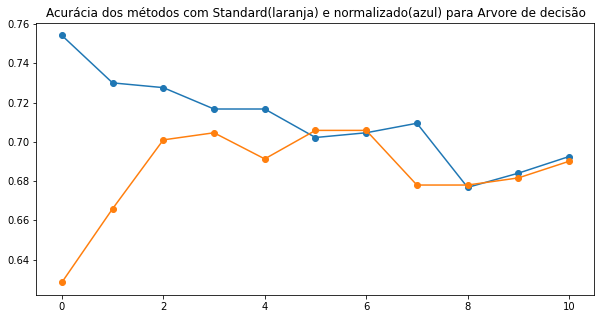

In [21]:
acc=[]
accstd =[]
accnor = []
for i in range(1,12):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_val_pca = pca.transform(X_val)

  clf = DecisionTreeClassifier()
  clf.fit(X_train_pca, y)
  pred_test = clf.predict(X_val_pca)
  acc.append(clf.score(X_val_pca, y_v))

  X_train_pca_std = pca.fit_transform(X_train_std)
  X_val_pca_std= pca.transform(X_val_std)
  clf.fit(X_train_pca_std,y)
  pred_test = clf.predict(X_val_pca_std)
  accstd.append(clf.score(X_val_pca_std, y_v))

  X_train_pca_nor = pca.fit_transform(X_train_nor)
  X_val_pca_nor = pca.transform(X_val_nor)
  clf.fit(X_train_pca_nor,y)
  pred_test = clf.predict(X_val_pca_nor)
  accnor.append(clf.score(X_val_pca_nor,y_v))
  
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
plt.title("Acurácia dos métodos com Standard(laranja) e normalizado(azul) para Arvore de decisão")
plt.plot(acc,'-o')
plt.plot(accstd,'-o')
plt.show()

[[320  95]
 [ 91 320]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       415
           1       0.77      0.78      0.77       411

    accuracy                           0.77       826
   macro avg       0.77      0.77      0.77       826
weighted avg       0.77      0.77      0.77       826

Acurácia: 0.774818401937046
Matriz de confusão, não normalizada
[[320  95]
 [ 91 320]]
Matriz normalizada
[[0.77108434 0.22891566]
 [0.22141119 0.77858881]]


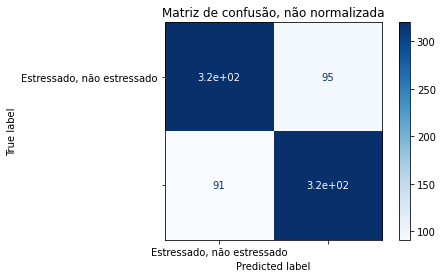

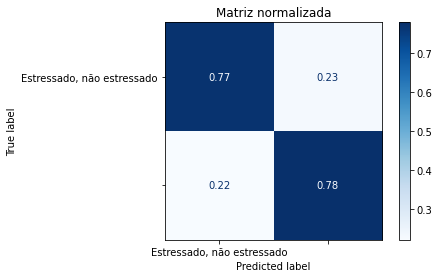

In [22]:

pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y)
pred_test = clf.predict(X_test_pca)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))
print("Acurácia:", accuracy_score(y_test,pred_test))
class_names = ['Estressado, não estressado']
clf = DecisionTreeClassifier().fit(X_train_pca,y)
titles_options = [("Matriz de confusão, não normalizada", None),
                  ("Matriz normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

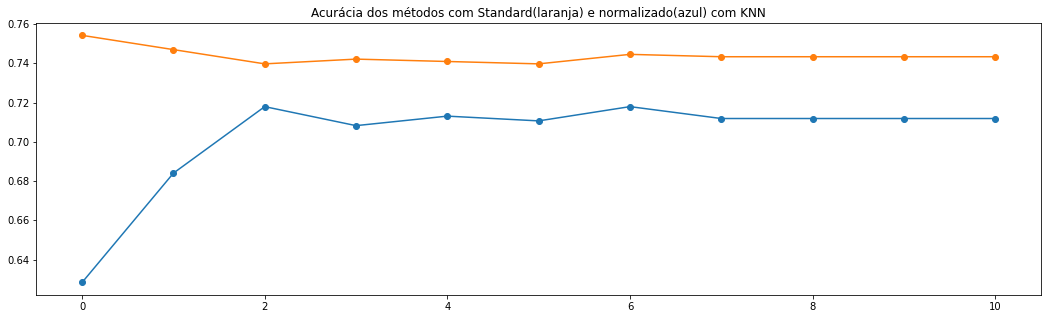

In [23]:
score=[]
score2=[]
k=1
for i in range(1,12):
    pca = PCA(n_components = i)
    x_train_std_pca = pca.fit_transform(X_train_std)
    x_test_std_pca = pca.transform(X_val_std)

    clf = KNeighborsClassifier(n_neighbors=k) 
    clf.fit(x_train_std_pca, y)
    score.append(clf.score(x_test_std_pca, y_val))

    x_train_std_pca = pca.fit_transform(X_train)
    x_test_std_pca = pca.transform(X_val)
    clf = KNeighborsClassifier(n_neighbors=k) 
    clf.fit(x_train_std_pca, y)
    score2.append(clf.score(x_test_std_pca, y_val))

plt.figure(figsize=(18, 5))
plt.title("Acurácia dos métodos com Standard(laranja) e normalizado(azul) com KNN")
plt.plot(score,'-o')
plt.plot(score2,'-o')
plt.show()

[[316  99]
 [ 90 321]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       415
           1       0.76      0.78      0.77       411

    accuracy                           0.77       826
   macro avg       0.77      0.77      0.77       826
weighted avg       0.77      0.77      0.77       826

Acurácia: 0.7711864406779662
Matriz de confusão, não normalizada
[[320  95]
 [ 91 320]]
Matriz normalizada
[[0.77108434 0.22891566]
 [0.22141119 0.77858881]]


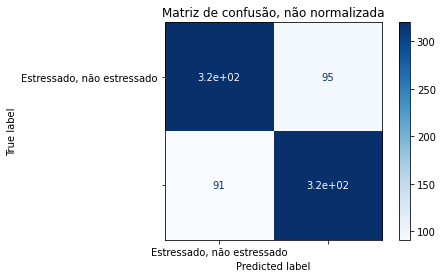

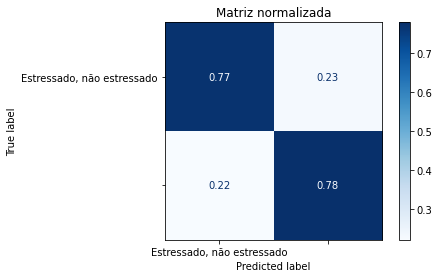

In [24]:

pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_pca, y)
pred_test = clf.predict(X_test_pca)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))
print("Acurácia:", accuracy_score(y_test,pred_test))
class_names = ['Estressado, não estressado']
clf = DecisionTreeClassifier().fit(X_train_pca,y)
titles_options = [("Matriz de confusão, não normalizada", None),
                  ("Matriz normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

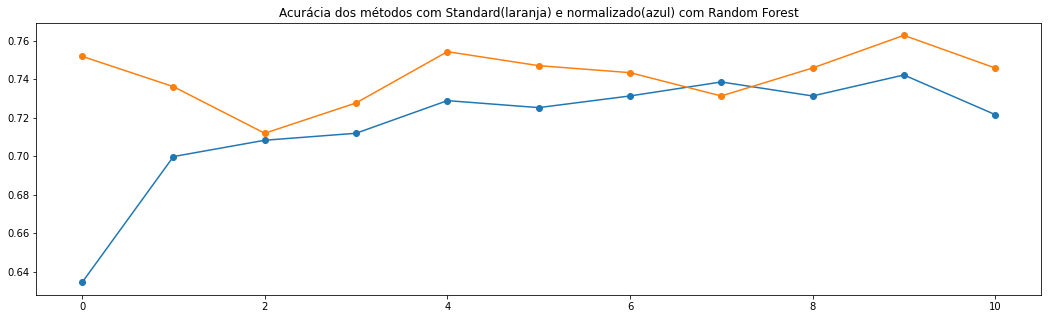

In [25]:
score=[]
score2=[]
k=30
for i in range(1,12):
    pca = PCA(n_components = i)
    x_train_std_pca = pca.fit_transform(X_train_std)
    x_test_std_pca = pca.transform(X_val_std)

    clf = RandomForestClassifier(n_estimators= k, random_state=0)
    clf.fit(x_train_std_pca, y)
    score.append(clf.score(x_test_std_pca, y_val))

    x_train_std_pca = pca.fit_transform(X_train)
    x_test_std_pca = pca.transform(X_val)
    clf = RandomForestClassifier(n_estimators= k, random_state=0)
    clf.fit(x_train_std_pca, y)
    score2.append(clf.score(x_test_std_pca, y_val))

plt.figure(figsize=(18, 5))
plt.title("Acurácia dos métodos com Standard(laranja) e normalizado(azul) com Random Forest")
plt.plot(score,'-o')
plt.plot(score2,'-o')
plt.show()

[[314 101]
 [ 90 321]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       415
           1       0.76      0.78      0.77       411

    accuracy                           0.77       826
   macro avg       0.77      0.77      0.77       826
weighted avg       0.77      0.77      0.77       826

Acurácia: 0.7687651331719129
Matriz de confusão, não normalizada
[[314 101]
 [ 90 321]]
Matriz normalizada
[[0.75662651 0.24337349]
 [0.2189781  0.7810219 ]]


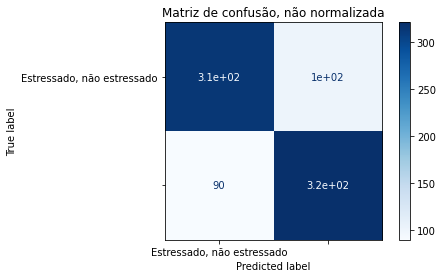

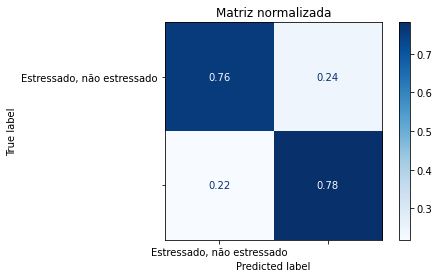

In [26]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
k=30
clf = RandomForestClassifier(n_estimators= k, random_state=0)
clf.fit(X_train_pca, y)
pred_test = clf.predict(X_test_pca)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))
print("Acurácia:", accuracy_score(y_test,pred_test))
class_names = ['Estressado, não estressado']
clf = RandomForestClassifier(n_estimators= k, random_state=0).fit(X_train_pca,y)
titles_options = [("Matriz de confusão, não normalizada", None),
                  ("Matriz normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [27]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y)
pred_test = clf.predict(X_val)
print(clf.score(X_val,y_v))
print(confusion_matrix(y_val,pred_test))
print(classification_report(y_val,pred_test))

0.7433414043583535
[[279 110]
 [102 335]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       389
           1       0.75      0.77      0.76       437

    accuracy                           0.74       826
   macro avg       0.74      0.74      0.74       826
weighted avg       0.74      0.74      0.74       826



In [28]:
clf = GaussianNB()
clf.fit(X_train,y)
pred_test = clf.predict(X_val)
print(clf.score(X_val,y_v))
print(confusion_matrix(y_val,pred_test))
print(classification_report(y_val,pred_test))

0.5677966101694916
[[189 200]
 [157 280]]
              precision    recall  f1-score   support

           0       0.55      0.49      0.51       389
           1       0.58      0.64      0.61       437

    accuracy                           0.57       826
   macro avg       0.56      0.56      0.56       826
weighted avg       0.57      0.57      0.57       826



In [29]:
clf= RandomForestClassifier(n_estimators=30,random_state=0)
clf.fit(X_train,y)
pred_test = clf.predict(X_val)
print(clf.score(X_val,y_v))
print(confusion_matrix(y_val,pred_test))
print(classification_report(y_val,pred_test))

0.7179176755447942
[[266 123]
 [110 327]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       389
           1       0.73      0.75      0.74       437

    accuracy                           0.72       826
   macro avg       0.72      0.72      0.72       826
weighted avg       0.72      0.72      0.72       826



In [30]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y)
pred_test = clf.predict(X_val)
print(clf.score(X_val,y_v))
print(confusion_matrix(y_val,pred_test))
print(classification_report(y_val,pred_test))

0.7130750605326877
[[266 123]
 [114 323]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       389
           1       0.72      0.74      0.73       437

    accuracy                           0.71       826
   macro avg       0.71      0.71      0.71       826
weighted avg       0.71      0.71      0.71       826



In [31]:
#cross_validation 
from sklearn.model_selection import cross_val_score

In [32]:
clf = RandomForestClassifier(n_estimators= 30)
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X, Y, cv=5, scoring='precision')
roc = cross_val_score(clf, X, Y, cv=5, scoring='roc_auc')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())
print(roc.mean())

0.618561009611857
0.6143234347057649
0.6216589861751152
0.6423660678507884
0.6580057143073619


In [46]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X)
scores = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5446891187908137
0.5001081569156736
0.4834101382488479
0.6061507260877559


In [34]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6001467459094578
0.619769659385864
0.6092165898617512
0.604729218235599


In [56]:
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X)
scores = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5483119818035072
0.6392389147454447
0.7852534562211982
0.5516074936322575


In [36]:
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5764026707755521
0.6040877694573601
0.616589861751152
0.5928719377261418


In [37]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X)
scores = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5437214762638491
0.5691411500276122
0.5755760368663595
0.5645325896180668


In [38]:
clf = GaussianNB()
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5655120698510528
0.5982689509285711
0.6539170506912442
0.5698858429240852


In [58]:
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X)
scores = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5483119818035072
0.6392389147454447
0.7852534562211982
0.5516074936322575
